In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## pyBKT library

In [8]:
!pip install pyBKT
from pyBKT.models import Model



In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/ct.csv", encoding='latin-1')
df.head()

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


In [10]:
df['Anon Student Id'].value_counts()

,count
Anon Student Id,
1T4w47X,84
271np4zc8vd1,68
171s0AHa,66
248iwnoa3,62
171TsMI6,62
...,...
271szevzza4w,3
171N6L94,2
225jFfJy6_a,2


In [11]:
df['KC(Default)'].value_counts()

,count
KC(Default),
Calculate unit rate,5273
Calculate part in proportion with fractions,3358
Calculate total in proportion with fractions,2968
Plot terminating proper fraction,1116
Plot imperfect radical,923
Plot non-terminating improper fraction,726
Plot whole number,590
Plot decimal - thousandths,564
Plot pi,417


In [12]:
model = Model(seed = 42, num_fits = 1)

# Fetch Assistments and CognitiveTutor data (optional - if you have your own dataset, that's fine too!)
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [13]:
model.fit(data_path = 'ct.csv')
print(model.params())

                                                               value
skill                                        param   class          
Plot non-terminating improper fraction       prior   default 0.59024
                                             learns  default 0.14616
                                             guesses default 0.16883
                                             slips   default 0.24147
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.22330
                                             learns  default 0.12973
                                             guesses default 0.10112
                                             slips   default 0.22205
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.50636
                                             learns  default 0.14004
                                  

In [14]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical")
print(model.params())

                                         value
skill                  param   class          
Plot imperfect radical prior   default 0.23915
                       learns  default 0.13805
                       guesses default 0.08715
                       slips   default 0.23205
                       forgets default 0.00000


In [15]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multigs = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.37367
                       learns  default       0.02572
                       guesses RATIONAL1-032 0.20400
                               RATIONAL1-041 0.26934
                               RATIONAL1-054 0.09395
                               RATIONAL1-059 0.10471
                               RATIONAL1-085 0.07721
                               RATIONAL1-089 0.17339
                               RATIONAL1-090 0.16923
                               RATIONAL1-096 0.11179
                               RATIONAL1-137 0.05144
                               RATIONAL1-138 0.00812
                               RATIONAL1-183 0.11875
                               RATIONAL1-184 0.15124
                               RATIONAL1-193 0.10345
                               RATIONAL1-200 0.19185
                               RATIONAL1-212 0

In [16]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.27982
                       learns  RATIONAL1-032 0.15138
                               RATIONAL1-041 0.09156
                               RATIONAL1-054 0.16137
                               RATIONAL1-059 0.15261
                               RATIONAL1-085 0.09421
                               RATIONAL1-089 0.16086
                               RATIONAL1-090 0.10907
                               RATIONAL1-096 0.11347
                               RATIONAL1-137 0.15312
                               RATIONAL1-138 0.15026
                               RATIONAL1-183 0.17219
                               RATIONAL1-184 0.11267
                               RATIONAL1-193 0.13742
                               RATIONAL1-200 0.15466
                               RATIONAL1-212 0.14694
                               RATIONAL1-220 0

In [18]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = "Anon Student Id")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(model.params())


                                              value
skill                  param   class               
Plot imperfect radical prior   default      0.41947
                       learns  0I891Gg      0.00044
                               17116XP9     0.00016
                               1712bs2B     0.00057
                               1715Zzr7     0.00417
                               1716AHha     0.01299
                               171HyaCo     0.00044
                               171J7Dty     0.01840
                               171MG7vY     0.00742
                               171N77mW     0.00742
                               171NGrBi     0.00044
                               171OPHDT     0.00213
                               171PKfdH     0.00035
                               171PSLfv     0.00044
                               171QWSC7     0.00213
                               171RUh1Q     0.00742
                               171RVz51     0.00742
            

## dummy data to experiment with pybkt


In [36]:

import random

num_students = 10
num_signs = 12
num_rows = 5000
signs = [f"SL_{i+1}" for i in range(num_signs)]
students = [f"S{str(i+1).zfill(2)}" for i in range(num_students)]
hint_types = [0, 1]

In [37]:


# Set initial mastery probabilities for each student (randomized between 0.3 and 0.5)
initial_mastery_probs = {student: random.uniform(0.3, 0.5) for student in students}

# Set the difficulty for each sign (1 to 5 scale, 5 being most difficult)
sign_difficulty = {f"SL_{i+1}": random.randint(1, 5) for i in range(num_signs)}

# Initialize the data with more realistic probabilities
realistic_data = []

for row_id in range(1, num_rows + 1):
    student_id = random.choice(students)
    sign = random.choice(signs)
    difficulty = sign_difficulty[sign]

    # Retrieve the current mastery probability for this student
    mastery_prob = initial_mastery_probs[student_id]

    # Simulate the effect of a hint: if a hint is provided, the likelihood of a correct answer increases
    hint = random.choice(hint_types)
    if hint == 1:
        mastery_prob = min(1, mastery_prob + 0.2)  # Increase mastery probability with a hint

    # Calculate the probability of a correct answer based on mastery and difficulty
    base_prob = max(0.1, mastery_prob - difficulty * 0.05)  # Harder signs reduce the probability
    correct = 1 if random.random() < base_prob else 0  # Simulate the correctness

    # Update the student's mastery probability based on whether they answered correctly
    if correct == 1:
        initial_mastery_probs[student_id] = min(1, mastery_prob + 0.05)  # Gradual increase in mastery

    # Store the row in the data
    realistic_data.append([row_id, student_id, sign, correct, hint])

# Create DataFrame
df_realistic = pd.DataFrame(realistic_data, columns=["row", "student_id", "sign", "correct", "hints"])

# Sort the data by student_id and row to maintain the temporal order
#df_realistic = df_realistic.sort_values(by=["student_id", "row"]).reset_index(drop=True)




In [39]:
df_realistic

,row,student_id,sign,correct,hints
0,1,S08,SL_10,1,1
1,2,S04,SL_4,0,0
2,3,S09,SL_4,1,1
3,4,S06,SL_3,1,1
4,5,S05,SL_7,0,0
5,6,S01,SL_4,1,1
6,7,S07,SL_2,0,1
7,8,S02,SL_1,0,0
8,9,S01,SL_2,1,1
9,10,S06,SL_4,1,1


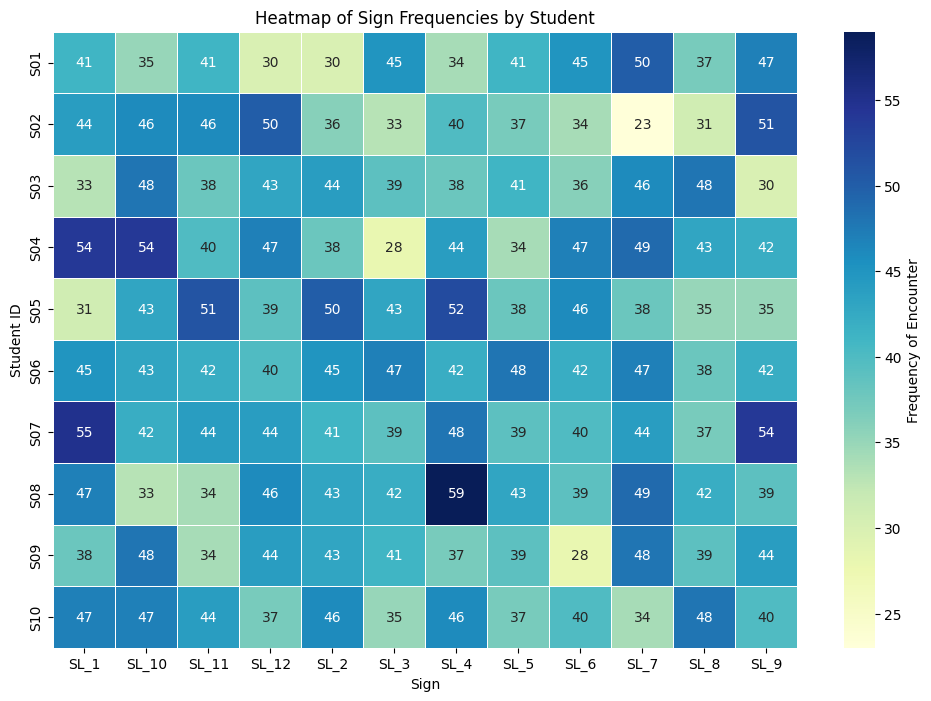

In [38]:


# Create a pivot table to count the frequency of each sign for each student
pivot_frequency = df_realistic.pivot_table(index="student_id", columns="sign", values="row", aggfunc="count", fill_value=0)

# Visualize with a heatmap for sign frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_frequency, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Frequency of Encounter'}, linewidths=0.5)
plt.title("Heatmap of Sign Frequencies by Student")
plt.xlabel("Sign")
plt.ylabel("Student ID")
plt.show()
